In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ADULT INCOME - check and prepare data

In [2]:
#reading the file into pandas
adult1= pd.read_csv('adult.csv')

In [3]:
adult1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
adult1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
#dropping variables not for use
adult1= adult1.drop(['capital-gain', 'fnlwgt', 'capital-loss'], axis=1)

"Full set of attributes"

In [7]:
adult1.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [8]:
#list comprehension conversion of income to 0,1
adult1['inc_01'] = [1 if item == '>50K' else 0 for item in list(adult1.income)]

In [ ]:
##########

DATA EXPLORATION = "DATA STORY"

Summary statistics for integer variables

In [9]:
#summary stats for integer variiables
adult1.describe()

,age,educational-num,hours-per-week,inc_01
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,40.422382,0.239282
std,13.710510,2.570973,12.391444,0.426649
min,17.000000,1.000000,1.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000
75%,48.000000,12.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000


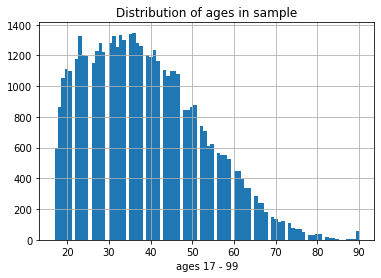

In [10]:
adult1.age.hist(bins=90)
plt.title('Distribution of ages in sample')
plt.xlabel('ages 17 - 99')
plt.show()


Average age: 38.6 years

C:\Users\rosal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'hours worked per week')

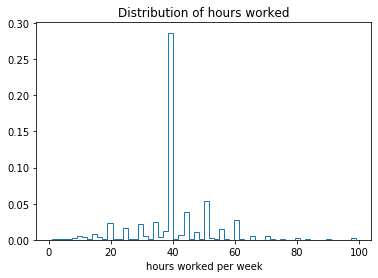

In [11]:
plt.hist(adult1['hours-per-week'], bins=60, normed=True, histtype='step')
plt.title('Distribution of hours worked')
plt.xlabel('hours worked per week')

Average hours worked per week: 40.42

In [12]:
#value counts for income outcome
count_inc= adult1.inc_01.value_counts()
count_inc

0    37155
1    11687
Name: inc_01, dtype: int64

Text(0.5, 0, "{0: 'less or equal', 1: 'greater'}")

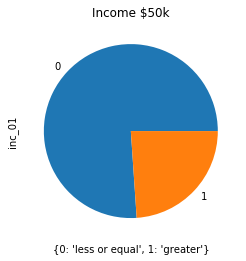

In [13]:
#plot income outcome
count_inc.plot(kind='pie')
plt.title('Income $50k')
plt.xlabel({0:'less or equal', 1:'greater'})

Counts for categorical variables of interest

In [14]:
adult1['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [15]:
adult1['educational-num'].value_counts().sort_index()

1        83
2       247
3       509
4       955
5       756
6      1389
7      1812
8       657
9     15784
10    10878
11     2061
12     1601
13     8025
14     2657
15      834
16      594
Name: educational-num, dtype: int64

In [17]:
#display lining up - unique values of education and educational-num, sorted on educational-num, zipped? 
ednum = adult1['educational-num'].unique()
edcat = adult1['education'].unique()
align = pd.DataFrame(ednum, edcat)
align

,0
11th,7
HS-grad,9
Assoc-acdm,12
Some-college,10
10th,6
Prof-school,15
7th-8th,4
Bachelors,13
Masters,14
Doctorate,16


Text(0.5, 0, '0 years of education to doctorate (16)')

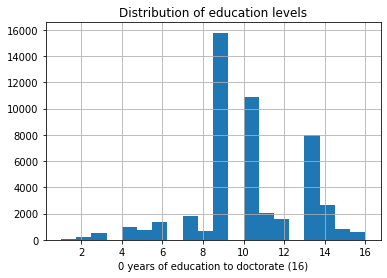

In [18]:
adult1['educational-num'].hist(bins=20)
plt.title('Distribution of education levels')
plt.xlabel('0 years of education to doctorate (16)')

Median education level: "some college."

In [19]:
#Counts for levels of work class
wk_class=adult1.workclass.value_counts()
wk_class

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Text(0.5, 1.0, 'Counts associated with sector/status')

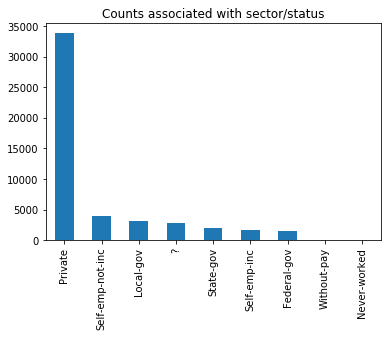

In [20]:
#Counts for levels of work class
wk_class=adult1.workclass.value_counts()
wk_class.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Counts associated with sector/status')

Private sector 69%, Public sector 13%, Self-employed 11%

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

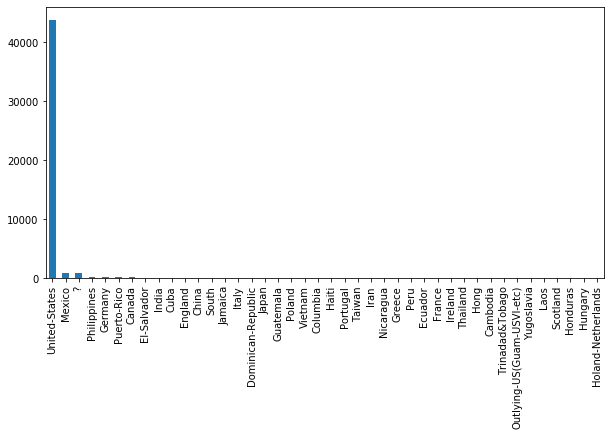

In [21]:
#Counts for native country
country=adult1['native-country'].value_counts()
country.plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=90)

Plotted comparisons of variables

In [22]:
import seaborn as sns

In [23]:
#create grouped by education level and income outcome
by_educ = adult1.groupby('educational-num').income.value_counts()

Text(0.5, 1.0, 'Income outcomes for education levels')

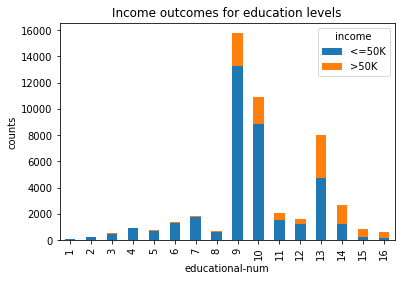

In [24]:
#plot income for each education level
by_educ.unstack().plot(kind='bar', stacked=True)
plt.ylabel('counts')
plt.title('Income outcomes for education levels')

Text(0.5, 1.0, 'Education Levels and Ages')

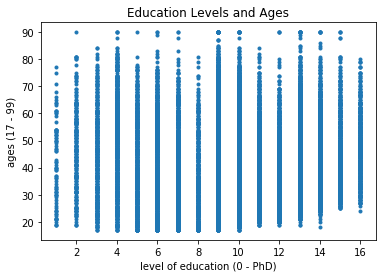

In [25]:
plt.plot(adult1['educational-num'], adult1['age'], marker='.', linestyle='none')
plt.xlabel('level of education (0 - PhD)')
plt.ylabel('ages (17 - 99)')
plt.title('Education Levels and Ages')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

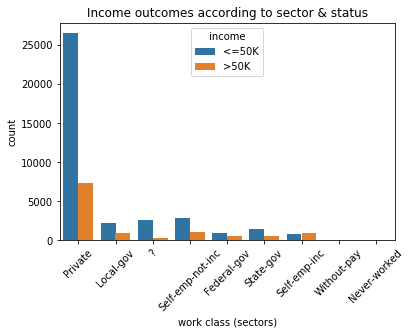

In [26]:
#countplot for income outcome based on workclass, which sector & status
plt.figsize=(20,10)
sns.countplot(data=adult1, x='workclass', hue='income')
plt.title('Income outcomes according to sector & status')
plt.xlabel('work class (sectors)')
plt.xticks(rotation=45)

In [27]:
#counts of work class
class_educc= adult1.groupby('workclass').education.value_counts()

Text(0.5, 1.0, 'Counts of work class by education level')

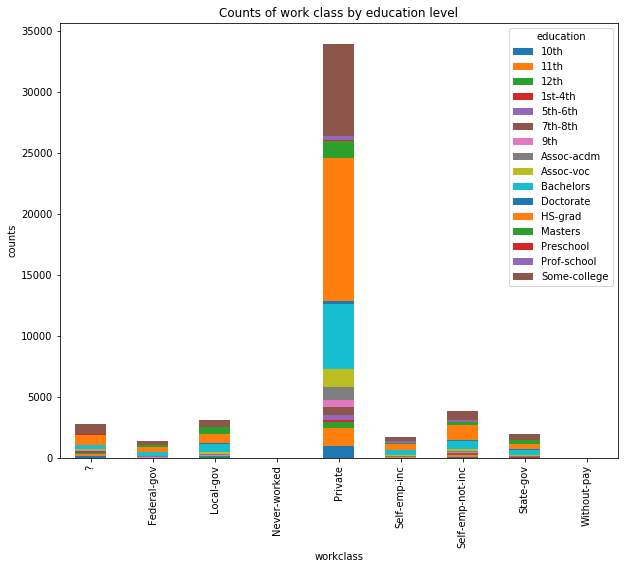

In [28]:
#Plot counts, workclass by education level
class_educc.unstack().plot(kind="bar", stacked=True, figsize= (10,8))
plt.ylabel("counts")
plt.title("Counts of work class by education level")

Text(0.5, 1.0, 'Relative education levels for work classes (normalized)')

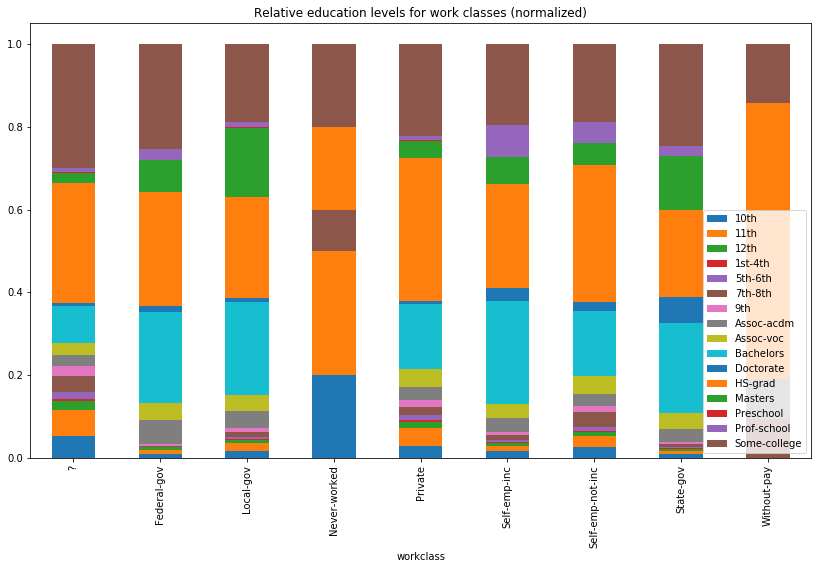

In [29]:
#Plot education by workclass (combination of sector and status) 
class_educcN= adult1.groupby('workclass').education.value_counts(normalize=True)
class_educcN.unstack().plot(kind="bar", stacked=True, figsize= (14,8))
plt.legend(loc= 'lower right')
plt.title('Relative education levels for work classes (normalized)')

End of "DATA STORY'

In [ ]:
############

INFERENTIAL ANALYIS

Selection of variables intended for use in statistical analysis

In [30]:
#select variables, predictors and target (income)
work = adult1[['age', 'workclass','hours-per-week', 'income', 'inc_01', 'education']]

In [31]:
#add and rename ordinal integer education variable
work['educ_num'] = adult1['educational-num']

C:\Users\rosal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
work.head()

,age,workclass,hours-per-week,income,inc_01,education,educ_num
0,25,Private,40,<=50K,0,11th,7
1,38,Private,50,<=50K,0,HS-grad,9
2,28,Local-gov,40,>50K,1,Assoc-acdm,12
3,44,Private,40,>50K,1,Some-college,10
4,18,?,30,<=50K,0,Some-college,10


In [33]:
levels_educ= work.education.drop_duplicates()

Testing null hypothesis: Samples, without a BA and with only a BA, show no effect on income using a two-sample t-test 

In [34]:
from scipy import stats

In [35]:
#create 2 samples for education levels: noBA; BA
noBA_inc = work.loc[work['educ_num'] < 13]['inc_01']

In [36]:
noBA_inc.shape

(36732,)

In [37]:
BA_inc = work.loc[work['educ_num'] == 13]['inc_01']

In [38]:
BA_inc.shape

(8025,)

In [39]:
t_ba, p_ba = stats.ttest_ind(noBA_inc, BA_inc, axis=0, equal_var=True, nan_policy= 'propagate')

In [40]:
print('t-statistic = '+ str(t_ba))
print('p-value = '+ str(p_ba))

t-statistic = -52.408681619739234
p-value = 0.0


From this comparison of income outcomes, the probabilty is 0.0 that the 2 samples, BA and noBA, are alike. Rejects the null hypothesis. Accepts the alternative hypothesis that a bachelors degree (BA) impacts income.

Testing correlations if categorical variables, education and workclass, have associations with the chi-squared test.
Null hypothesis: education and workclass are independent variables.

In [41]:
#create a cross-tabulation of education and workclass
ct_edu_cls = pd.crosstab(work.education, work.workclass)
print(ct_edu_cls)

workclass       ?  Federal-gov  Local-gov  Never-worked  Private  \
education                                                          
10th          148           15         52             2     1022   
11th          178           14         61             3     1412   
12th           58            8         25             0      512   
1st-4th        18            1          5             0      203   
5th-6th        41            1         13             0      409   
7th-8th       110            4         40             1      624   
9th            69            6         31             0      568   
Assoc-acdm     72           81        129             0     1085   
Assoc-voc      83           61        124             0     1488   
Bachelors     253          313        700             0     5303   
Doctorate      18           22         35             0      263   
HS-grad       810          395        761             2    11682   
Masters        67          110        526       

In [42]:
#chi-squared statistic and contingency table education - workclass
chi_stat, pval, dof, exp = stats.chi2_contingency(ct_edu_cls)
print('chi-squared statistic = '+ str(chi_stat))
print('degrees of freedom = '+ str(dof))
print('p-value = '+ str(pval))
print(exp)

chi-squared statistic = 3906.1080264021853
degrees of freedom = 120
p-value = 0.0
[[7.95997502e+01 4.07241309e+01 8.91835715e+01 2.84386389e-01
  9.64240490e+02 4.82034929e+01 1.09830023e+02 5.63369436e+01
  5.97211416e-01]
 [1.03840711e+02 5.31260800e+01 1.16343147e+02 3.70992179e-01
  1.25788608e+03 6.28831743e+01 1.43277179e+02 7.34935506e+01
  7.79083576e-01]
 [3.76508538e+01 1.92626019e+01 4.21840219e+01 1.34515376e-01
  4.56087834e+02 2.28003563e+01 5.19498383e+01 2.66474960e+01
  2.82482290e-01]
 [1.41548872e+01 7.24180009e+00 1.58591376e+01 5.05712297e-02
  1.71466811e+02 8.57182343e+00 1.95306089e+01 1.00181606e+01
  1.06199582e-01]
 [2.91693829e+01 1.49233856e+01 3.26813808e+01 1.04213587e-01
  3.53346587e+02 1.76642029e+01 4.02472872e+01 2.06447115e+01
  2.18848532e-01]
 [5.47284100e+01 2.79996724e+01 6.13177184e+01 1.95528439e-01
  6.62958724e+02 3.31420703e+01 7.55130830e+01 3.87341837e+01
  4.10609721e-01]
 [4.33242701e+01 2.21651857e+01 4.85405184e+01 1.54784816e-01
  5.

Reject the null hypothesis that these two variables are independent. Workclass, which is a combination of work-sector and -status, and level of education are correlated.

Testing correlation of relative years of education and hours worked. 
Null hypothesis: educ_num and hours-per-week are independent variables.

In [43]:
import researchpy as rp

In [44]:
ed_cls = pd.DataFrame(work[['educ_num', 'hours-per-week']])

In [45]:
rp.corr_pair(ed_cls, method=None)

,r value,p-value,N
educ_num & hours-per-week,0.1437,0.0000,48842


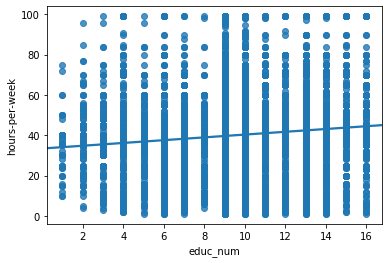

In [46]:
edn_hrs= sns.regplot(x='educ_num', y='hours-per-week', data=work)

Fail to reject the null hypothesis. There appears to be no significant correlation between education levels and hours worked per week.

In [ ]:
#############

CLASSIFICATION PREDICTION - 
Supervised Machine Learning models: K-Nearest Neighbor, Logisitic Regression, Decision Tree, Random Forest, Gradient Boosting

In [47]:
#preprocessing for categoricals, drop dupicate, id
adultml= adult1.drop(['education','income'], axis=1)

In [48]:
#categoricals one-hot encoding (alt drop_first=True) 
adultml= pd.get_dummies(adultml)

In [49]:
#assign target, predictors
X = adultml.drop('inc_01', axis=1)
y = adultml.inc_01
df = pd.DataFrame(X)

In [50]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [51]:
#split data, training set 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

K-Nearest Neighbors (KNN)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn= KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
k_pred_y= knn.predict(X_test)
print("Test set prediction:\\n {}\ ".format(k_pred_y))

Test set prediction:\n [0 1 1 ... 0 0 0]\ 


In [54]:
#knn confusion matrix [[TP,FN],[FP,TN]] & classification rpt
print("KNN")
print(confusion_matrix(y_test, k_pred_y))
print(classification_report(y_test, k_pred_y))

KNN
[[10057  1090]
 [ 1512  1994]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11147
           1       0.65      0.57      0.61      3506

    accuracy                           0.82     14653
   macro avg       0.76      0.74      0.75     14653
weighted avg       0.82      0.82      0.82     14653



Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logreg= LogisticRegression()
logreg.fit(X_train, y_train)
lr_pred_y= logreg.predict(X_test)
print("Test set prediction:\\n {}\ ".format(lr_pred_y))

C:\Users\rosal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test set prediction:\n [0 0 0 ... 0 0 0]\ 


In [57]:
#logistic regression confusion matrix & classification rpt
print('Logistic Regression')
print(confusion_matrix(y_test, lr_pred_y))
print(classification_report(y_test, lr_pred_y))

Logistic Regression
[[10328   819]
 [ 1562  1944]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11147
           1       0.70      0.55      0.62      3506

    accuracy                           0.84     14653
   macro avg       0.79      0.74      0.76     14653
weighted avg       0.83      0.84      0.83     14653



In [58]:
#logistic regression metric for good model 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [59]:
#Compute ROC curve and AUC
ypred_prob= logreg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds= roc_curve(y_test, ypred_prob)
auc= roc_auc_score(y_test, ypred_prob)
print('AUC =', str(auc))

AUC = 0.8863113003526845


Text(0.5, 1.0, 'Logistic Regression ROC')

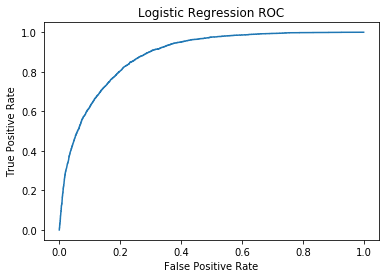

In [60]:
#Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')

Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtree= DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dt_pred_y= dtree.predict(X_test)
print("Test set prediction:\\n {}\ ".format(dt_pred_y))

Test set prediction:\n [0 0 1 ... 0 1 0]\ 


In [63]:
#Decision tree confusion matrix & classification rpt
print('Decision Tree')
print(confusion_matrix(y_test, dt_pred_y))
print(classification_report(y_test, dt_pred_y))

Decision Tree
[[9676 1471]
 [1659 1847]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     11147
           1       0.56      0.53      0.54      3506

    accuracy                           0.79     14653
   macro avg       0.71      0.70      0.70     14653
weighted avg       0.78      0.79      0.78     14653



Random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rforest= RandomForestClassifier()
rforest.fit(X_train, y_train)
rf_pred_y= rforest.predict(X_test)
print("Test set prediction:\\n {}\ ".format(rf_pred_y))

C:\Users\rosal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Test set prediction:\n [0 0 0 ... 0 0 0]\ 


In [66]:
#Random forest confusion matrix & classification rpt
print('Random Forest')
print(confusion_matrix(y_test, rf_pred_y))
print(classification_report(y_test, rf_pred_y))

Random Forest
[[10096  1051]
 [ 1674  1832]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     11147
           1       0.64      0.52      0.57      3506

    accuracy                           0.81     14653
   macro avg       0.75      0.71      0.73     14653
weighted avg       0.80      0.81      0.81     14653



Gradient Boost

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gboost= GradientBoostingClassifier()
gboost.fit(X_train, y_train)
gb_pred_y= gboost.predict(X_test)
print("Test set prediction:\\n {}\ ".format(gb_pred_y))

Test set prediction:\n [0 0 1 ... 0 0 0]\ 


In [69]:
#Gradient Boost confusion matrix & classification rpt
print('Gradient Boost')
print(confusion_matrix(y_test, gb_pred_y))
print(classification_report(y_test, gb_pred_y))

Gradient Boost
[[10413   734]
 [ 1561  1945]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11147
           1       0.73      0.55      0.63      3506

    accuracy                           0.84     14653
   macro avg       0.80      0.74      0.76     14653
weighted avg       0.84      0.84      0.84     14653



In [70]:
#Compute ROC curve and AUC
gb_predy_prob= gboost.predict_proba(X_test)[:,1]
fpr_gb,tpr_gb,thresholds= roc_curve(y_test, gb_predy_prob)
gb_auc= roc_auc_score(y_test, gb_predy_prob)
print('GB AUC =', str(gb_auc))

GB AUC = 0.8935646518334485


In [ ]:
#Plot GB ROC curve
plt.plot(fpr_gb, tpr_gb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boost ROC')

Using the best performing models, Gradient Boosting and Logistic Regression, on a subset of attributes. Attributes include the relevant variables selected for education level exploration and privacy considerations. These variables are reflected in the above exploratory data and statistical analyses.

Predicting on a Subset of Attributes

In keeping with privacy considerations and emphasis of education, the subset of predictors only include education, hours per week, work class and age. For visual simplicity's sake, the scattermatrix includes only age, education and hours per week.

In [72]:
#preprocessed columns of full data set
adultml.columns

Index(['age', 'educational-num', 'hours-per-week', 'inc_01', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Tran

In [74]:
#dropping attribute and dummy columns for privacy
priv_inc = adultml.drop(['marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'gender_Female', 'gender_Male',
       'native-country_?', 'native-country_Cambodia', 'native-country_Canada',
       'native-country_China', 'native-country_Columbia',
       'native-country_Cuba', 'native-country_Dominican-Republic',
       'native-country_Ecuador', 'native-country_El-Salvador',
       'native-country_England', 'native-country_France',
       'native-country_Germany', 'native-country_Greece',
       'native-country_Guatemala', 'native-country_Haiti',
       'native-country_Holand-Netherlands', 'native-country_Honduras',
       'native-country_Hong', 'native-country_Hungary', 'native-country_India',
       'native-country_Iran', 'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Nicaragua',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
       'native-country_Philippines', 'native-country_Poland',
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'], axis=1)

In [75]:
#assign target, predictors (and df for scatter matrix but too many dummy columns)
Xp = priv_inc.drop('inc_01', axis=1)
yp = priv_inc.inc_01
dfp = pd.DataFrame(Xp)

In [76]:
dfp.head(5)

,age,educational-num,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,25,7,40,0,0,0,0,1,0,0,0,0
1,38,9,50,0,0,0,0,1,0,0,0,0
2,28,12,40,0,0,1,0,0,0,0,0,0
3,44,10,40,0,0,0,0,1,0,0,0,0
4,18,10,30,1,0,0,0,0,0,0,0,0


In [77]:
#Preparation for scattermatrix dropping dummy workclass levels
dfp_notwc=dfp.drop(['workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B310B56D8>,
      dtype=object)

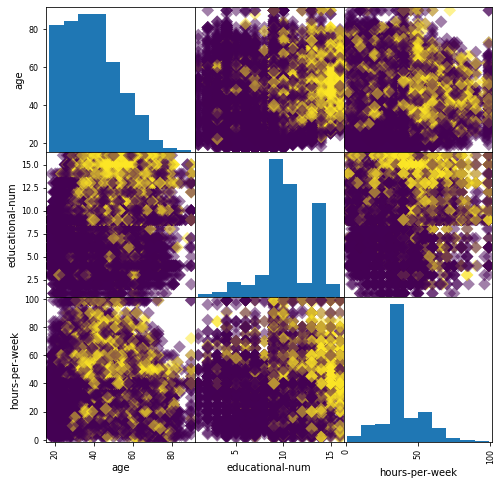

In [93]:
pd.plotting.scatter_matrix(dfp_notwc, c=yp, figsize=[8,8], s=80, marker='D')

The scattermatrix between age, education and hours per week confirms the lack of correlation between educaton and hours per week. The contribution of the age attribute is as expected. 

In [79]:
#Splitting training and test data, same test size and ramdom state
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.3, random_state=21, stratify=yp)

In [80]:
#predicting on the privacy data subset
gboost_p= GradientBoostingClassifier()
gboost_p.fit(Xp_train, yp_train)
gb_pred_yp= gboost_p.predict(Xp_test)
print("Test set prediction:\\n {}\ ".format(gb_pred_yp))

Test set prediction:\n [0 0 1 ... 0 1 0]\ 


In [81]:
#Privacy subset Gradient Boost confusion matrix & classification rpt
print('Gradient Boosting on selected attributes')
print(confusion_matrix(yp_test, gb_pred_yp))
print(classification_report(yp_test, gb_pred_yp))

Gradient Boost on selected attributes
[[10447   700]
 [ 2169  1337]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     11147
           1       0.66      0.38      0.48      3506

    accuracy                           0.80     14653
   macro avg       0.74      0.66      0.68     14653
weighted avg       0.79      0.80      0.78     14653



With the subset of variables, the preferred model on the full set of attributes, the accuracy score went down from .84 to .80.

In [83]:
logreg_p= LogisticRegression()
logreg_p.fit(Xp_train, yp_train)
lr_pred_yp= logreg_p.predict(Xp_test)

C:\Users\rosal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
#logistic regression confusion matrix & classification rpt
print('Logistic Regression on selected attributes')
print(confusion_matrix(yp_test, lr_pred_yp))
print(classification_report(yp_test, lr_pred_yp))

Logistic Regression on selected attributes
[[10493   654]
 [ 2387  1119]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     11147
           1       0.63      0.32      0.42      3506

    accuracy                           0.79     14653
   macro avg       0.72      0.63      0.65     14653
weighted avg       0.77      0.79      0.77     14653



With selected attributes, Logistic Regression, the second preferred model, has an accuracy of .79. 

These two models perform roughly the same at .84 on the test data set. The AUC scores only gave the edge to Gradient Boosting. Logistic Regression on the subset of attributes has an accuracy score of .79 compared to Gradient Boosting with .80.